In [99]:
import numpy as np #Numerical Computing
import pandas as pd #Data manipulation and analysis
import matplotlib.pyplot as plt #creating plots and visualizations in Python
import seaborn as sns # High-level interface for drawing attractive and informative statistical graphics
%matplotlib inline #Allows matplotlib plots to be displayed directly in the notebook,rather than in a separate window or file.

UsageError: unrecognized arguments: #Allows matplotlib plots to be displayed directly in the notebook,rather than in a separate window or file.


In [100]:
normal_hb =  pd.read_csv("ptbdb_normal.csv", header=None)#header=None--Pandas will use default integer column names
abnormal_hb =  pd.read_csv("ptbdb_abnormal.csv", header=None)


In [101]:
#pip install peakutils(already installed)
import numpy as np
import peakutils

def peak_detection(ecg_data, threshold=0.5):#peak must be at least 50% higher than its neighboring points to be detected as a peak.
    # Smooth the ECG signal
    smoothed_ecg = np.convolve(ecg_data, np.ones(5)/5, mode='same')
    
    # Use peakutils library for peak detection
    peak_indices = peakutils.indexes(smoothed_ecg, thres=threshold)
    
    return peak_indices


In [102]:
# Segment normal ECG data
segmented_normal_beats = []
for signal in normal_hb.itertuples(index=False):#This loop iterates over each row (signal) in the DataFrame normal_hb.

  ecg_data = list(signal)
  peak_indices = peak_detection(ecg_data)
  for peak_index in peak_indices:
    window_size = 200  #typical duration of a single heartbeat in an ECG signal-100-300ms
    start_index = max(0, peak_index - window_size // 2)
    end_index = min(len(ecg_data), peak_index + window_size // 2 + 1)
    segmented_normal_beats.append(ecg_data[start_index:end_index])

# Now you have segmented_normal_beats,which is a list containing individual heartbeat segments

In [103]:
#Missing Label Column (normal ECG recording)
normal_labels = ['0'] * len(segmented_normal_beats)  # Create a list with '0' for all segments

#This line creates a list called normal_labels with the length equal to the number of segments in the segmented_normal_beats list.
#Each element in normal_labels is set to '0', indicating that the corresponding segment is from a normal ECG recording.


In [104]:
# Segment abnormal ECG data
segmented_abnormal_beats = []
for signal in abnormal_hb.itertuples(index=False):
    ecg_data = list(signal)
    peak_indices = peak_detection(ecg_data)
    for peak_index in peak_indices:
        window_size = 200  # Adjust window size as needed (milliseconds)
        start_index = max(0, peak_index - window_size // 2)
        end_index = min(len(ecg_data), peak_index + window_size // 2 + 1)
        segmented_abnormal_beats.append(ecg_data[start_index:end_index])

# Now you have segmented_abnormal_beats, which is a list containing individual abnormal heartbeat segments



In [105]:
#Missing Label Column (Assuming abnormal ECG recording)
abnormal_labels = ['1'] * len(segmented_abnormal_beats)  # Create a list with '1' for all segments

# DATA VISUALIZATION 

NORMAL HEARTBEATS

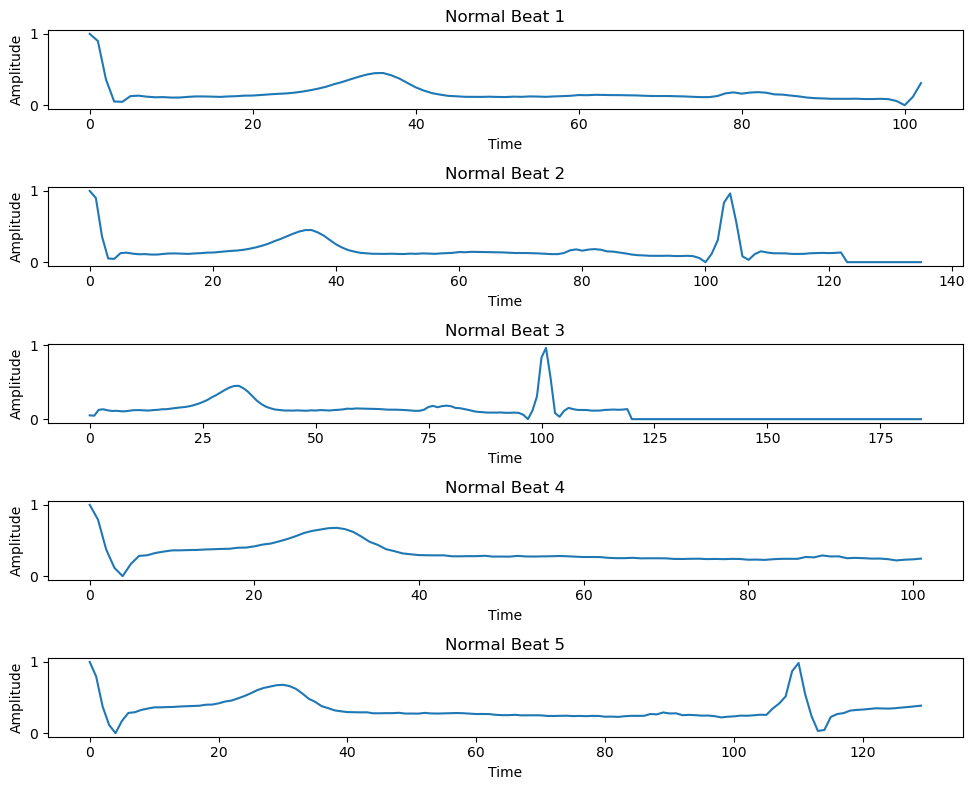

In [106]:
import matplotlib.pyplot as plt

# Plot a few examples of normal ECG beats
num_examples_to_plot = 5
fig, axs = plt.subplots(num_examples_to_plot, figsize=(10, 8))

for i in range(num_examples_to_plot):
    axs[i].plot(segmented_normal_beats[i])
    axs[i].set_title(f"Normal Beat {i+1}")#'f'--embed expressions directly within string literals
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Amplitude")

plt.tight_layout()#Adjusts the spacing between subplots to prevent overlap
plt.show()



ABNORMAL HEARTBEATS

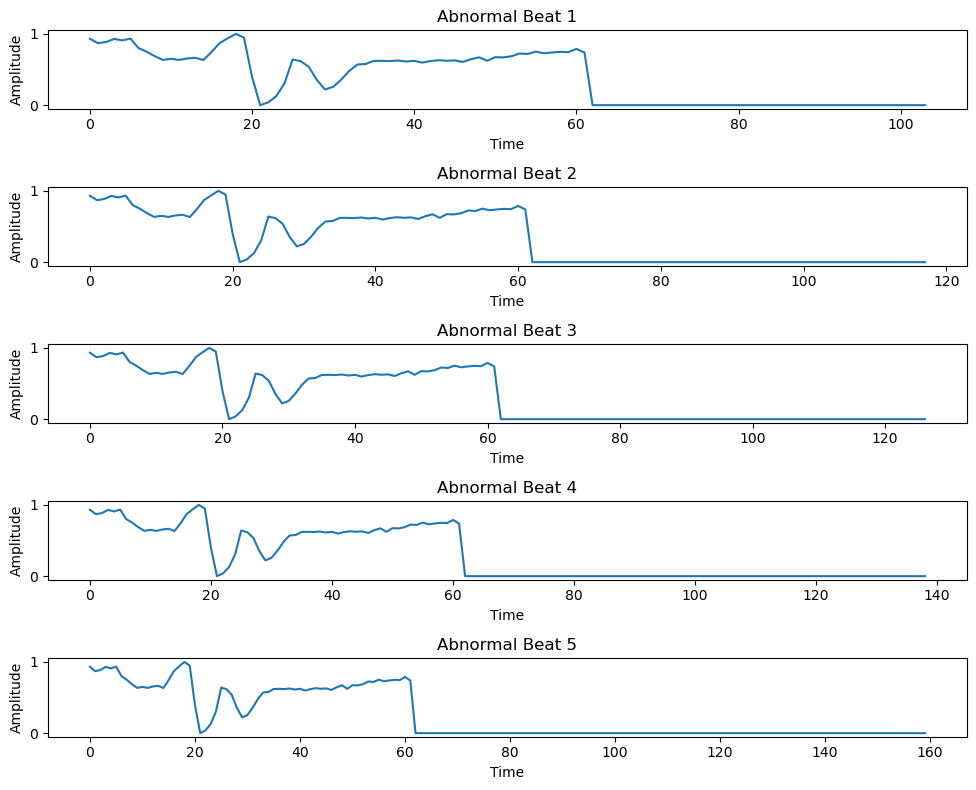

In [107]:
# Plot a few examples of abnormal ECG beats
fig, axs = plt.subplots(num_examples_to_plot, figsize=(10, 8))

for i in range(num_examples_to_plot):
    axs[i].plot(segmented_abnormal_beats[i])
    axs[i].set_title(f"Abnormal Beat {i+1}")
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Amplitude")

plt.tight_layout()#Adjusts the spacing between subplots to prevent overlap
plt.show()


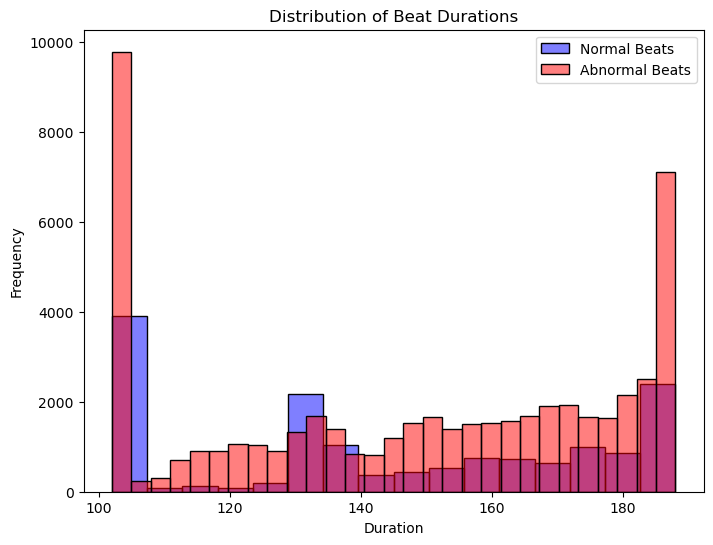

In [108]:
# Calculate the duration of each beat
normal_beat_durations = [len(beat) for beat in segmented_normal_beats]
abnormal_beat_durations = [len(beat) for beat in segmented_abnormal_beats]

# Plot the distribution of beat durations
plt.figure(figsize=(8, 6))
sns.histplot(normal_beat_durations, color='blue', alpha=0.5, label='Normal Beats')
sns.histplot(abnormal_beat_durations, color='red', alpha=0.5, label='Abnormal Beats')
plt.title('Distribution of Beat Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [109]:
# Assuming you already have segmented_normal_beats from the previous step

normal_labels = ['0'] * len(segmented_normal_beats)  # Create a list with '0' for all segments

abnormal_labels = ['1'] * len(segmented_abnormal_beats)  # Create a list with '1' for all segments


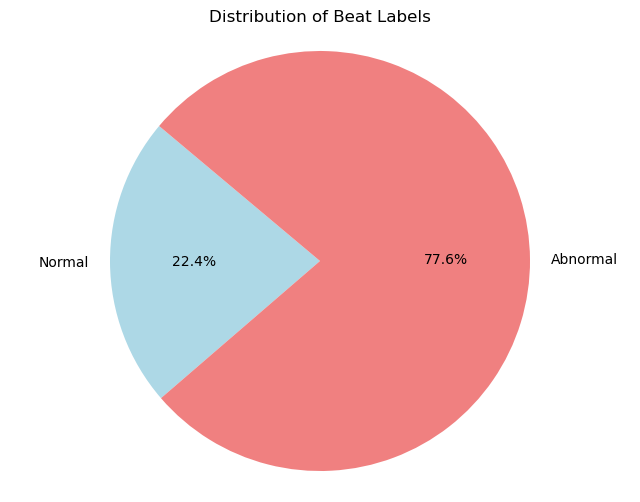

In [110]:
import matplotlib.pyplot as plt

# Count occurrences of each label
normal_count = len(normal_labels)
abnormal_count = len(abnormal_labels)

# Plot the pie chart
labels = ['Normal', 'Abnormal']
sizes = [normal_count, abnormal_count]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Beat Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [111]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Combine normal and abnormal data along with labels
X = segmented_normal_beats + segmented_abnormal_beats
y = normal_labels + abnormal_labels

# Shuffle the data to randomize the order of samples
X, y = shuffle(X, y, random_state=42)

In [112]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()

In [113]:
unique_labels = np.unique(y_test)
print(unique_labels)


['0' '1']


In [114]:
# Pad sequences to a fixed length
max_length = max(len(seq) for seq in X_train)
X_train_padded = pad_sequences(X_train, maxlen=max_length, dtype='float32', padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, dtype='float32', padding='post')

In [115]:
# Train classifiers
decision_tree.fit(X_train_padded, y_train)
random_forest.fit(X_train_padded, y_train)
naive_bayes.fit(X_train_padded, y_train)

# Predict on the test set
y_pred_dt = decision_tree.predict(X_test_padded)
y_pred_rf = random_forest.predict(X_test_padded)
y_pred_nb = naive_bayes.predict(X_test_padded)


In [116]:
# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')


In [117]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

In [118]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')


In [119]:
print("Decision Tree:")
print("  Accuracy:", accuracy_dt)
print("  Precision:", precision_dt)
print("  Recall:", recall_dt)
print("  F1 Score:", f1_dt)

print("Random Forest:")
print("  Accuracy:", accuracy_rf)
print("  Precision:", precision_rf)
print("  Recall:", recall_rf)
print("  F1 Score:", f1_rf)

print("Naive Bayes:")
print("  Accuracy:", accuracy_nb)
print("  Precision:", precision_nb)
print("  Recall:", recall_nb)
print("  F1 Score:", f1_nb)

Decision Tree:
  Accuracy: 0.9703529757099876
  Precision: 0.957432726193151
  Recall: 0.9584682549674469
  F1 Score: 0.9579491734851138
Random Forest:
  Accuracy: 0.9889924414764805
  Precision: 0.987881647766985
  Recall: 0.9807424372615932
  F1 Score: 0.9842546771708509
Naive Bayes:
  Accuracy: 0.5617524033169443
  Precision: 0.6623216827794192
  Recall: 0.7080854213305017
  F1 Score: 0.5557728558149398


In [120]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Reshape X to 2D array if necessary
X_resampled, y_resampled = oversampler.fit_resample(np.array(X).reshape(-1, 1), y)#convert an array into a column vector. 

# Convert back to list format
X_resampled = X_resampled.tolist()

# Check the class distribution after resampling
print("Class distribution after resampling:", np.bincount(y_resampled))


Class distribution after resampling: [52844 52844]


C:\Users\lubdh\AppData\Local\Temp\ipykernel_8552\2412579955.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_resampled, y_resampled = oversampler.fit_resample(np.array(X).reshape(-1, 1), y)


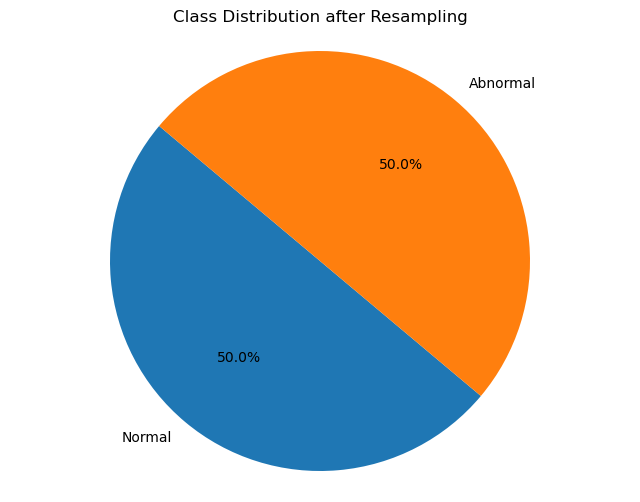

In [121]:
import matplotlib.pyplot as plt

# Calculate class distribution after resampling
class_distribution = np.bincount(y_resampled)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_distribution, labels=['Normal', 'Abnormal'], autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution after Resampling')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# RNN GENERATIVE MODEL

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to generate random ECG heartbeat data with abnormalities
def generate_random_ecg(num_samples, seq_length):
    # Generate random ECG signals with noise
    ecg_signals = np.random.normal(size=(num_samples, seq_length))
    # Simulate abnormal signals by adding spikes or irregular patterns
    for signal in ecg_signals:
        num_spikes = np.random.randint(1, 4)  # Randomly add 1-3 spikes per signal
        spike_indices = np.random.choice(seq_length, size=num_spikes, replace=False)
        signal[spike_indices] += np.random.uniform(0.5, 2.0, size=num_spikes)  # Add spikes with varying magnitudes
    return ecg_signals

# Generate synthetic ECG heartbeat data
num_samples = 1000  # Number of samples
seq_length = 1000   # Length of each sequence
ecg_data = generate_random_ecg(num_samples, seq_length)

# Split the data into training and testing sets
X_train, X_test = train_test_split(ecg_data, test_size=0.2, random_state=42)

# Pad sequences to ensure uniform length for input to LSTM
X_train_padded = pad_sequences(X_train, maxlen=seq_length, dtype='float32')
X_test_padded = pad_sequences(X_test, maxlen=seq_length, dtype='float32')

# Define and train the LSTM model
model = Sequential([
    LSTM(64, input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_padded[..., np.newaxis], X_train_padded, epochs=20, batch_size=32)
#include all dimensions of the input data


Epoch 1/20
25/25 [==============================] - 13s 451ms/step - loss: 1.0037
Epoch 2/20
25/25 [==============================] - 11s 436ms/step - loss: 1.0025
Epoch 3/20
25/25 [==============================] - 12s 465ms/step - loss: 1.0024
Epoch 4/20
25/25 [==============================] - 11s 461ms/step - loss: 1.0025
Epoch 5/20
25/25 [==============================] - 11s 436ms/step - loss: 1.0024
Epoch 6/20
25/25 [==============================] - 11s 454ms/step - loss: 1.0024
Epoch 7/20
25/25 [==============================] - 11s 442ms/step - loss: 1.0024
Epoch 8/20
25/25 [==============================] - 12s 464ms/step - loss: 1.0024
Epoch 9/20
25/25 [==============================] - 11s 449ms/step - loss: 1.0024
Epoch 10/20
25/25 [==============================] - 11s 450ms/step - loss: 1.0025
Epoch 11/20
25/25 [==============================] - 11s 431ms/step - loss: 1.0024
Epoch 12/20
25/25 [==============================] - 11s 452ms/step - loss: 1.0024
Epoch 13/20
2

In [13]:
# Generate new ECG heartbeat data using the trained model
num_generated_samples = 100
generated_ecg_data = []
for _ in range(num_generated_samples):
    # Choose a random seed sequence from the training set
    seed_index = np.random.randint(0, len(X_train))
    seed_sequence = X_train[seed_index]
    # Reshape the seed sequence for prediction
    seed_sequence_reshaped = seed_sequence.reshape(1, seq_length, 1)# we're predicting only one sequence at a time,
    #so the batch size is 1.
    #ECG data is univariate (i.e., it consists of a single feature - the amplitude of the ECG signal), 
    #so the feature dimension is 1.
    
    # Generate new sequence using the trained model
    generated_sequence = model.predict(seed_sequence_reshaped)
    generated_ecg_data.append(generated_sequence.squeeze())

# Convert generated ECG data to numpy array
generated_ecg_data = np.array(generated_ecg_data)

# Print the generated ECG data to check for valid values
print("Generated ECG Data:")
print(generated_ecg_data)





1/1 [==============================] - 0s 81ms/step
Generated ECG Data:
[ 0.00080769 -0.00204481  0.00258777  0.00368467 -0.00558735  0.00312616
  0.00143722 -0.01456932  0.00203224 -0.00265656  0.00328169  0.0101034
 -0.0037013   0.00719079  0.00029098 -0.00178109  0.00222843 -0.00795616
  0.00371569 -0.00064264 -0.00213203 -0.00185488  0.0007228   0.00032777
  0.00226786 -0.00565362 -0.00343486  0.00524291 -0.0035205   0.00175743
 -0.00592938  0.00363954 -0.00358228  0.00613472  0.00899796 -0.01036434
 -0.00727255 -0.00695158 -0.00152805 -0.00493391  0.00990731 -0.00537981
 -0.00248392 -0.00396706 -0.01191909 -0.00333299 -0.00339563 -0.00644446
  0.00430573 -0.00037328 -0.00446212 -0.00367313 -0.00144563 -0.00210188
 -0.01191909 -0.00508059  0.00825402  0.00792641  0.00308103  0.00611552
  0.00064626 -0.01001032  0.00464599  0.00929314 -0.0017126  -0.00039658
 -0.00629515  0.00463889 -0.0013238  -0.0096416  -0.00210188  0.00381495
  0.01716219  0.00838874 -0.00508059 -0.00307252 -0.0

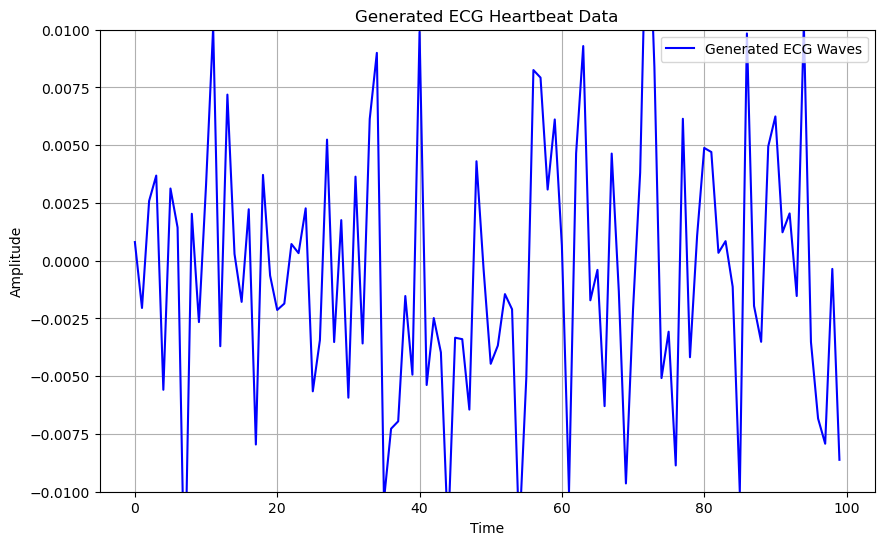

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Sample generated ECG waves
generated_ecg_data = np.array([0.00080769, -0.00204481, 0.00258777, 0.00368467, -0.00558735, 0.00312616,
                                0.00143722, -0.01456932, 0.00203224, -0.00265656, 0.00328169, 0.0101034,
                                -0.0037013, 0.00719079, 0.00029098, -0.00178109, 0.00222843, -0.00795616,
                                0.00371569, -0.00064264, -0.00213203, -0.00185488, 0.0007228, 0.00032777,
                                0.00226786, -0.00565362, -0.00343486, 0.00524291, -0.0035205, 0.00175743,
                                -0.00592938, 0.00363954, -0.00358228, 0.00613472, 0.00899796, -0.01036434,
                                -0.00727255, -0.00695158, -0.00152805, -0.00493391, 0.00990731, -0.00537981,
                                -0.00248392, -0.00396706, -0.01191909, -0.00333299, -0.00339563, -0.00644446,
                                0.00430573, -0.00037328, -0.00446212, -0.00367313, -0.00144563, -0.00210188,
                                -0.01191909, -0.00508059, 0.00825402, 0.00792641, 0.00308103, 0.00611552,
                                0.00064626, -0.01001032, 0.00464599, 0.00929314, -0.0017126, -0.00039658,
                                -0.00629515, 0.00463889, -0.0013238, -0.0096416, -0.00210188, 0.00381495,
                                0.01716219, 0.00838874, -0.00508059, -0.00307252, -0.00886223, 0.00614494,
                                -0.00417801, 0.00106871, 0.00488247, 0.00470528, 0.00034207, 0.0008471,
                                -0.00112656, -0.01001032, 0.00983834, -0.00195598, -0.00350976, 0.0049533,
                                0.00624559, 0.0012305, 0.00204754, -0.00152805, 0.01025722, -0.00351969,
                                -0.00683248, -0.00792153, -0.00035419, -0.00861835])


time_indices = range(len(generated_ecg_data))

# Plot the generated ECG signals with adjusted axis limits
plt.figure(figsize=(10, 6))
plt.plot(time_indices, generated_ecg_data, color='blue', label='Generated ECG Waves')
plt.title('Generated ECG Heartbeat Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ylim(-0.01, 0.01)  # Adjust the y-axis limits to better fit the data
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()
